In [2]:
'''Linear Regression Model'''
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('/content/drive/MyDrive/Training Machine Learning/Transformed2.csv')

sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({'Sale_Price':sale_price,'Flat_Area':flat_area})

## Creating a mean regression model
sample_data['mean_sale_price'] = sample_data.Sale_Price.mean()

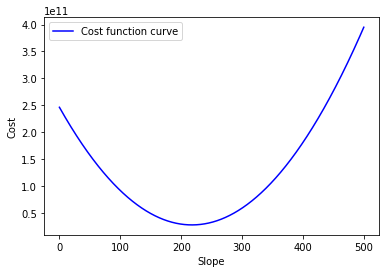

In [39]:
c=0
m=0
line=[]
for i in range(len(sample_data)):
    line.append(sample_data.Flat_Area[i]*m+c)

from sklearn.metrics import mean_squared_error as mse


# We can see that the line fits the graph properly when we increase the values of m.
# We can write a function that helps the line to fit the data properly.
def slope_func(slope,intercept,sample_data):
    sale = []
    for i in range(len(sample_data.Flat_Area)):
        tmp=sample_data.Flat_Area[i]*slope+intercept
        sale.append(tmp)
    MSE = mse(sample_data.Sale_Price,sale)
    return MSE

slope=[i/10 for i in range(0,5000)]
Cost=[]
for i in slope:
    cost=slope_func(slope=i,intercept=39428,sample_data=sample_data)
    Cost.append(cost)

'''Arranging in Dataframe'''
cost_frame=pd.DataFrame({
    'Slope':slope,
    'Cost':Cost
})
# Plotting the cost data according to every beta

plt.plot(cost_frame.Slope,cost_frame.Cost,color='blue',label='Cost function curve')
plt.xlabel('Slope')
plt.ylabel('Cost')
plt.legend()
plt.show()

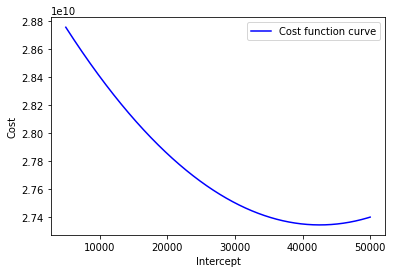

In [43]:
def intercept_error(slope,intercept,sample_data):
    sale = []
    for i in range(len(sample_data.Flat_Area)):
        tmp=sample_data.Flat_Area[i]*slope+intercept
        sale.append(tmp)
    MSE = mse(sample_data.Sale_Price,sale)
    return MSE

intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    # slope=234 we get from the graph
    cost=intercept_error(slope=217.7,intercept=i,sample_data=sample_data)
    Cost.append(cost)

cost_frame=pd.DataFrame({
    'intercept':intercept,
    'cost':Cost
})

plt.plot(cost_frame.intercept,cost_frame.cost,color='blue',label='Cost function curve')
plt.xlabel('Intercept')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [41]:
new_slope=cost_frame['Slope'][cost_frame['Cost']==cost_frame['Cost'].min()].values
new_slope[0]

217.7

In [44]:
new_intercept=cost_frame['intercept'][cost_frame['cost']==cost_frame['cost'].min()].values
new_intercept[0]

42541

The values of m and c converge to 219 and 39428 respectively after repeated adjustment of data